In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
df=pd.read_csv('realestate_data_london_2024_nov.csv')
df

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price
0,10/10/2024,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,"£24,950,000"
1,Reduced on 24/10/2024,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,"£29,500,000"
2,Reduced on 22/02/2024,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,"£25,000,000"
3,08/04/2024,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,"£24,950,000"
4,Reduced on 11/07/2023,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,"£24,950,000"
...,...,...,...,...,...,...,...,...,...
1014,Added today,3 bedroom apartment for sale in Battersea Powe...,NO STAMP DUTY This stunning penthouse apartmen...,Apartment,2601.0,3.0,4.0,new,"£6,500,000"
1015,Reduced on 11/07/2024,"6 bedroom house for sale in Winnington Close, ...",We are pleased to bring to the market for the ...,House,NaN,6.0,4.0,price_reduced,"£6,500,000"
1016,28/08/2024,"3 bedroom apartment for sale in Vicarage Gate,...","Welcome to 2 Vicarage Gate House, a sophistica...",Apartment,2508.0,3.0,3.0,new,"£6,500,000"
1017,Reduced on 12/08/2024,"3 bedroom house for sale in Chester Row, Belgr...",A fantastic opportunity to purchase an immacul...,House,NaN,3.0,3.0,price_reduced,"£6,500,000"


In [ ]:
# addedOn: Date when the property listing was added or updated on the website.
# title: Brief listing title describing the property, typically including the number of bedrooms and the location.
# descriptionHtml: Detailed description of the property, including features and potentially some promotional language.
# propertyType: Type of property, such as House, Terraced, or Detached.
# sizeSqFeetMax: Maximum size of the property in square feet, if provided.
# bedrooms: Number of bedrooms in the property.
# bathrooms: Number of bathrooms in the property.
# listingUpdateReason: Reason for updating the listing (e.g., new listing, price reduction).
# price: Price at which the property is listed for sale.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   addedOn              1011 non-null   object 
 1   title                1019 non-null   object 
 2   descriptionHtml      1019 non-null   object 
 3   propertyType         1019 non-null   object 
 4   sizeSqFeetMax        869 non-null    float64
 5   bedrooms             1003 non-null   float64
 6   bathrooms            984 non-null    float64
 7   listingUpdateReason  1019 non-null   object 
 8   price                1019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 71.8+ KB


In [ ]:


# Handle both 'Reduced on' and 'Added today' prefixes
df['addedOn'] = df['addedOn'].str.replace('Reduced on ', '', regex=False)
# The regex=False argument ensures it's treated as a literal string, not a regular expression. This ensures all dates are in a consistent format that can be parsed.
df['addedOn'] = df['addedOn'].str.replace('Added today', pd.Timestamp.today().strftime('%d/%m/%Y'), regex=False)

# Convert to datetime, errors='coerce' handles any remaining unparsable dates
df['addedOn'] = pd.to_datetime(df['addedOn'], format='%d/%m/%Y', errors='coerce')

In [ ]:
pd.Timestamp.today().strftime('%d/%m/%Y')

'02/12/2024'

In [ ]:
df['addedOn']

,addedOn
0,2024-10-10
1,2024-10-24
2,2024-02-22
3,2024-04-08
4,2023-07-11
...,...
1014,2024-12-02
1015,2024-07-11
1016,2024-08-28
1017,2024-08-12


In [ ]:
df['price'] = df['price'].replace({'£':'',',':'','POA':np.nan},regex=True).astype(float)
# regex=True is set, meaning the keys of the dictionary will be treated as regular expressions. This is important to handle potential variations in the price format.

In [ ]:
df.dtypes

,0
addedOn,datetime64[ns]
title,object
descriptionHtml,object
propertyType,object
sizeSqFeetMax,float64
bedrooms,float64
bathrooms,float64
listingUpdateReason,object
price,float64


In [ ]:
df.isna().sum()

,0
addedOn,19
title,0
descriptionHtml,0
propertyType,0
sizeSqFeetMax,150
bedrooms,16
bathrooms,35
listingUpdateReason,0
price,1


In [ ]:
df['addedOn'] = df['addedOn'].fillna(method='ffill')  # Forward fill
# ffill: Propagates the last observed valid date forward to fill the NaT values.


# Predicting null values in 'sizeSqFeetMax' colummn with the help of 'bedrooms','bathrooms','price'

In [ ]:
df.corr(numeric_only=True)
# there is a correlation among sizeSqFeetMax	bedrooms	bathrooms	price

,sizeSqFeetMax,bedrooms,bathrooms,price
sizeSqFeetMax,1.000000,0.167107,0.168877,0.135724
bedrooms,0.167107,1.000000,0.910657,0.188368
bathrooms,0.168877,0.910657,1.000000,0.240694
price,0.135724,0.188368,0.240694,1.000000


In [ ]:
df.loc[df['sizeSqFeetMax'].isnull()][['bedrooms','bathrooms','price']]
# or
# df[df['sizeSqFeetMax'].isnull()][['sizeSqFeetMax']]


,bedrooms,bathrooms,price
29,11.0,11.0,30000000.0
35,4.0,4.0,42217600.0
45,5.0,5.0,60000000.0
47,3.0,1.0,475000.0
50,6.0,5.0,18000000.0
...,...,...,...
1002,6.0,4.0,6500000.0
1006,7.0,6.0,6500000.0
1008,5.0,4.0,6500000.0
1015,6.0,4.0,6500000.0


In [ ]:
from sklearn.linear_model import LinearRegression
x=df[['bedrooms', 'bathrooms', 'price','sizeSqFeetMax']]
X=x.dropna()
y_train=X['sizeSqFeetMax']
y_train
X
x_train=X.drop('sizeSqFeetMax',axis=1)
x_train
model=LinearRegression()
model.fit(x_train,y_train)



LinearRegression()

In [ ]:
# df2=df[df['sizeSqFeetMax'].isnull()][['sizeSqFeetMax','bedrooms', 'bathrooms', 'price']]
# x1_test=df2.drop('sizeSqFeetMax',axis=1)
# x_test=x1_test.dropna()
# x_test.index
# y_test=model.predict(x_test)

# df3=df2[~(df2['bedrooms'].isnull())&~(df2['bathrooms'].isnull())]
# df3['sizeSqFeetMax']=y_test
# df3
# for i in df3.index:
#     df.loc[i,'sizeSqFeetMax']=df3.loc[i,'sizeSqFeetMax']
# df






In [ ]:
df2=df[df['sizeSqFeetMax'].isnull()][['bedrooms','bathrooms', 'price']]
df2
x_test=df2.dropna()
x_test.index
y_test=model.predict(x_test)

df3=df2[~(df2['bedrooms'].isnull())&~(df2['bathrooms'].isnull())]
df3['sizeSqFeetMax']=y_test
df3
for i in df3.index:
    df.loc[i,'sizeSqFeetMax']=df3.loc[i,'sizeSqFeetMax']
df

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price
0,2024-10-10,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.000000,8.0,8.0,new,24950000.0
1,2024-10-24,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.000000,7.0,7.0,price_reduced,29500000.0
2,2024-02-22,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.000000,6.0,6.0,price_reduced,25000000.0
3,2024-04-08,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.000000,6.0,6.0,new,24950000.0
4,2023-07-11,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.000000,8.0,10.0,price_reduced,24950000.0
...,...,...,...,...,...,...,...,...,...
1014,2024-12-02,3 bedroom apartment for sale in Battersea Powe...,NO STAMP DUTY This stunning penthouse apartmen...,Apartment,2601.000000,3.0,4.0,new,6500000.0
1015,2024-07-11,"6 bedroom house for sale in Winnington Close, ...",We are pleased to bring to the market for the ...,House,4743.944357,6.0,4.0,price_reduced,6500000.0
1016,2024-08-28,"3 bedroom apartment for sale in Vicarage Gate,...","Welcome to 2 Vicarage Gate House, a sophistica...",Apartment,2508.000000,3.0,3.0,new,6500000.0
1017,2024-08-12,"3 bedroom house for sale in Chester Row, Belgr...",A fantastic opportunity to purchase an immacul...,House,3065.761501,3.0,3.0,price_reduced,6500000.0


In [ ]:
df.isna().sum()

,0
addedOn,0
title,0
descriptionHtml,0
propertyType,0
sizeSqFeetMax,17
bedrooms,16
bathrooms,35
listingUpdateReason,0
price,1


In [ ]:
df.columns

Index(['addedOn', 'title', 'descriptionHtml', 'propertyType', 'sizeSqFeetMax',
       'bedrooms', 'bathrooms', 'listingUpdateReason', 'price'],
      dtype='object')

In [ ]:
df

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price
0,2024-10-10,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.000000,8.0,8.0,new,24950000.0
1,2024-10-24,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.000000,7.0,7.0,price_reduced,29500000.0
2,2024-02-22,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.000000,6.0,6.0,price_reduced,25000000.0
3,2024-04-08,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.000000,6.0,6.0,new,24950000.0
4,2023-07-11,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.000000,8.0,10.0,price_reduced,24950000.0
...,...,...,...,...,...,...,...,...,...
1014,2024-12-02,3 bedroom apartment for sale in Battersea Powe...,NO STAMP DUTY This stunning penthouse apartmen...,Apartment,2601.000000,3.0,4.0,new,6500000.0
1015,2024-07-11,"6 bedroom house for sale in Winnington Close, ...",We are pleased to bring to the market for the ...,House,4743.944357,6.0,4.0,price_reduced,6500000.0
1016,2024-08-28,"3 bedroom apartment for sale in Vicarage Gate,...","Welcome to 2 Vicarage Gate House, a sophistica...",Apartment,2508.000000,3.0,3.0,new,6500000.0
1017,2024-08-12,"3 bedroom house for sale in Chester Row, Belgr...",A fantastic opportunity to purchase an immacul...,House,3065.761501,3.0,3.0,price_reduced,6500000.0


In [ ]:
df.drop(['title','descriptionHtml','listingUpdateReason'],axis=1,inplace=True)
# since it gives same info as that of other columns

Text(0.5, 0, 'Price in crores')

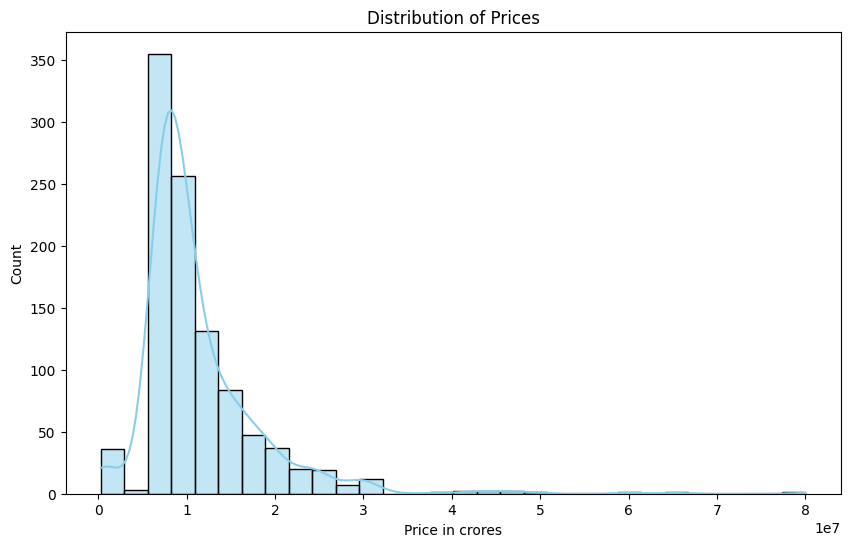

In [ ]:
# Price Distribution using Histogram(Univariate)
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=30,kde=True,color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price in crores')


In [ ]:
# Inferences from the histplot:The distribution of prices appears to be right-skewed (positively skewed).
#  Higher peaks in the KDE curve indicate regions with higher concentrations of prices.
# Skewness: The positive skew implies that the mean (average) price will be higher than both the median and mode. This is because high-priced items pull the average upwards.
#  The tail of the distribution extends further to the right, indicating a higher frequency of lower values and fewer higher values.



Text(0.5, 1.0, 'Box Plot of Price')

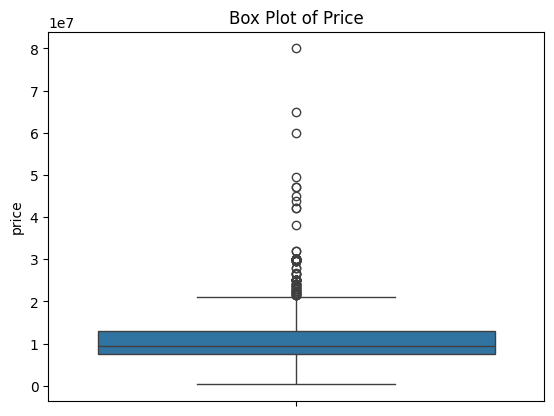

In [ ]:

sns.boxplot(df['price'])
plt.title('Box Plot of Price')

Text(0.5, 1.0, 'Scatter Plot of Size vs Price')

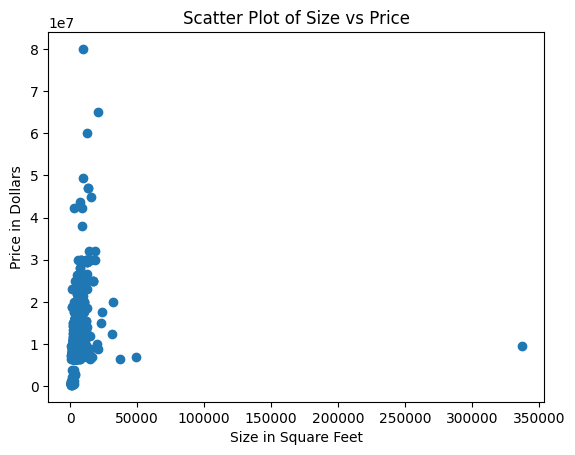

In [ ]:
plt.scatter(x=df['sizeSqFeetMax'],y=df['price'])
plt.xlabel('Size in Square Feet')
plt.ylabel('Price in Dollars')
plt.title('Scatter Plot of Size vs Price')

Text(0.5, 1.0, 'Distribution of Property Types')

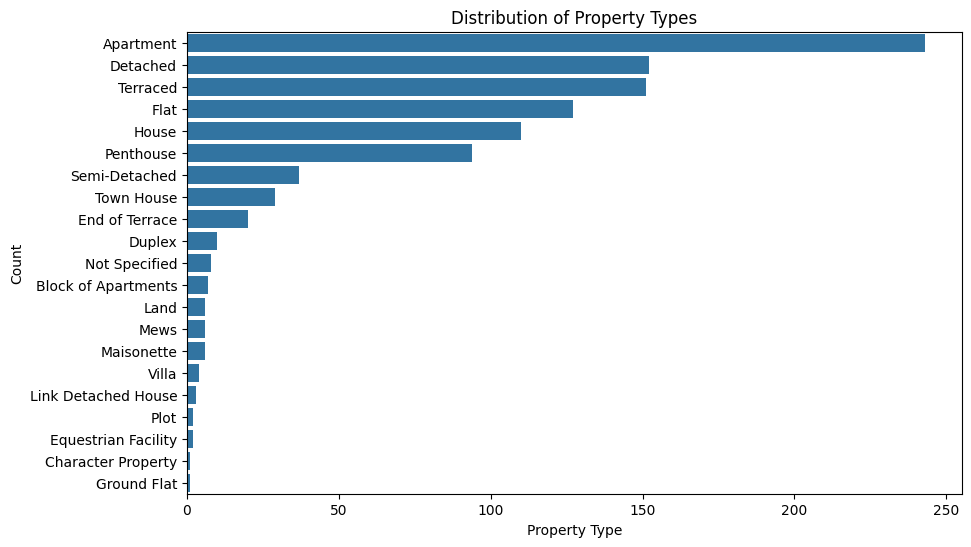

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df['propertyType'],order=df['propertyType'].value_counts().index)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Property Types')

In [ ]:
df.isna().sum()

,0
addedOn,0
propertyType,0
sizeSqFeetMax,17
bedrooms,16
bathrooms,35
price,1


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
addedOn,0
propertyType,0
sizeSqFeetMax,0
bedrooms,0
bathrooms,0
price,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['propertyType']=le.fit_transform(df['propertyType'])

In [ ]:
x=df.drop(['price','addedOn'],axis=1)
y=df['price']


,0
addedOn,datetime64[ns]
propertyType,int64
sizeSqFeetMax,float64
bedrooms,float64
bathrooms,float64
price,float64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,r2_score
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_absolute_percentage_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

9.08408900325516e-12
1.0
